#spark

<div id="section1"   dir='rtl'>
    <h2>
اسپارک یک فریم ورک برای بیگ دیتا محسوب می شود که  بیش از 80 اپراتور سطح بالا را ارائه می دهد که ساخت برنامه های موازی را آسان می کند. و می توانیم از پوسته های Scala ، Python ، R و SQL به صورت تعاملی استفاده کنیم و شامل مجموعه ای از کتابخانه ها  اعم از SparkSQL ،  spark streaming ، ( MLlib برای ماشین لرنینگ  )  و SparkGraphX   می باشد
که می توان از همه ی اینها باهم برای ساخت یک اپ استفاده کرد </div>
</h2>
        <hr>
#Spark runs on Hadoop, Apache Mesos, Kubernetes, standalone, or in the cloud. It can access diverse data sources.

<div id="section1"   dir='rtl'>
    <h2>
در این گام به بررسی دستورات پایه بر روی یک فایل تکست می پردازیم </div>
</h2>
        <hr>

Installing Spark Install Dependencies: ```

Java 8
Apache Spark with hadoop and
Findspark (used to locate the spark in the system)

<div id="section1"   dir='rtl'>
    <h2>
   از ورژن 3 اسپارک برای این بخش استفاده می کنیم  </div>
</h2>
        <hr>

In [ ]:
#!rm -r spark*

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

Set Environment Variables:


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) 
spark

install to drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div id="section1"   dir='rtl'>
    <h2>
اابتدا فایل تکست را در اسپارک به کمک تابع textfile می خوانیم</div>
</h2>
        <hr>

In [5]:
sc = spark.sparkContext
textfile=sc.textFile("/content/drive/MyDrive/spark/Datasets/1/input.txt")

In [6]:
textfile.take(3)

['Games are a fun way to get people involved and learning in a happy environment and get them to work on concepts and tactics without them knowing it a lot of the time. Because of this, these games were perfect in a class on negotiation and persuasion because it loosened people up and allowed them to learn in a fun environment. The games used in this class were reinforcing the concepts we talked about and got familiar with in the lectures, but the games were a safe place where we could give them a spin, test drive these persuasion tactics on our peers. With this we were able to make the connection between theory and application of concepts which have no use on paper. This class was about learning how to use language and framing to the extent where you make people think they want what you want, get to identify with your subject and get them on your level before you persuade them to act, and such concepts are great in theory but the application of them takes some practice and with master

#step1

#proccessing 
#remove_punctuation_mark
<div id="section1"   dir='rtl'>
    <h2>
قبل از شروع این گام طبق خواسته ی مسئله ابتدا پیش پردازش انجام می دهیم به این صورت علامت های نقطه گذاری مثل تعجب و... را از فایل تکست حذف می کنیم</div>
</h2>
        <hr>

In [7]:
def remove_punctuation_mark(i):
  punc='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-\t'
  for j in punc:
    i = i.replace(j, '')
  return i

<div id="section1"   dir='rtl'>
    <h2>
سپس با استفاده از تابع map در اسپارک این تابع تعریف شده در بالا که عملیات حئف علائم نقطه گذاری را برای ما انجام می دهد،بر روی فایل تکست اثر می دهیم</div>
</h2>
        <hr>

In [8]:
textfile = textfile.map(remove_punctuation_mark)

<div id="section1"   dir='rtl'>
    <h2>
   می توانیم ببینیم  علائم نقطه گذاری در متن حذف شده است  </div>
</h2>
        <hr>

In [9]:
textfile.take(3)

['Games are a fun way to get people involved and learning in a happy environment and get them to work on concepts and tactics without them knowing it a lot of the time Because of this these games were perfect in a class on negotiation and persuasion because it loosened people up and allowed them to learn in a fun environment The games used in this class were reinforcing the concepts we talked about and got familiar with in the lectures but the games were a safe place where we could give them a spin test drive these persuasion tactics on our peers With this we were able to make the connection between theory and application of concepts which have no use on paper This class was about learning how to use language and framing to the extent where you make people think they want what you want get to identify with your subject and get them on your level before you persuade them to act and such concepts are great in theory but the application of them takes some practice and with mastery as Rufo

#first part of this step

<div id="section1"   dir='rtl'>
    <h2>
   بعد از انجام پراسس اولیه به سراغ سوال های این بخش می رویم که این بخش چند پارت دارد در پارت اول از ما خواسته شده است که تعداد کلمات این تکست را بشماریم که برای اینکار ابتدا با استفاده از لامبدا و تابع flatMap  در اسپارک کل تکست این فایل را در یک لیست قرار می دهیم سپس با استفاده از تابع split در این تابع کلمات را جدا میکنیم و بدون در نظر گرفتن فاصله ی بین کلمات، کلمات را می شماریم    </div>
</h2>
        <hr>

In [10]:
countword=textfile.flatMap(lambda word: word.split(" ")).filter(lambda x:x!='')


#countword=textfile.flatMap(lambda doc:(doc.split(' ')))

<div id="section1"   dir='rtl'>
    <h2>
5004 کلمه در این فایل تکست وجود دارد    </div>
</h2>
        <hr>

In [11]:
countword.count()

5004

#second part of this step

<div id="section1"   dir='rtl'>
    <h2>
در دومین بخش از این بخش از ما خواسته شده که ببینیم هر کلمه چندبار در این فایل تکرار شده است که برای این بخش از دو راه می توان عمل کرد .راه اول این است که با تابع flatMap کل تکست را به یک لیست ببریم سپس با استفاده از تابع split در این تابع کل لغات را جدا کنیم و در تابع با تابع کلمات را به صورت دوتایی در بیاریم که هر دوتایی شامل کلمه و تعداد ان است که همان 1 است و در ادامه با استفاده از تابع reduceByKey کلمات مشابه را باهم جمع کنیم  </div>
</h2>
        <hr>

#first way

In [12]:
counts = textfile.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)

<div id="section1"   dir='rtl'>
    <h2>
  در نهایت تعداد هرکلمه را بشماریم    </div>
</h2>
        <hr>

In [13]:
counts.take(10)

[('Games', 1),
 ('are', 32),
 ('way', 17),
 ('learning', 3),
 ('in', 116),
 ('them', 33),
 ('work', 3),
 ('concepts', 4),
 ('of', 162),
 ('Because', 2)]

<div id="section1"   dir='rtl'>
    <h2>
  برای اینکه کل کلمات را نشان دهیم از تابع collect استفاده می کنیم سپس همه ی کلمات با تکرار انرا نمایش می دهیم    </div>
</h2>
        <hr>

In [14]:
output = counts.collect()
for (word, count) in output:
    print("%s: %i" % (word, count))

Games: 1
are: 32
way: 17
learning: 3
in: 116
them: 33
work: 3
concepts: 4
of: 162
Because: 2
this: 44
these: 14
games: 15
perfect: 2
class: 7
negotiation: 2
persuasion: 4
loosened: 1
The: 23
used: 6
we: 6
got: 2
but: 19
safe: 4
where: 12
give: 4
test: 1
peers: 1
able: 1
make: 6
connection: 1
have: 39
no: 5
use: 11
was: 41
language: 2
extent: 1
think: 12
identify: 4
subject: 1
before: 3
act: 3
as: 24
us: 1
anything: 1
really: 7
is: 76
possible: 3
Bullshit: 3
Werewolf: 3
goes: 1
names: 1
purposes: 1
“Fuck: 1
“game”: 1
only: 8
didn’t: 3
count: 1
several: 1
overlapped: 1
I’m: 5
These: 6
three: 5
when: 21
away: 3
help: 3
long: 2
run: 2
like: 19
tell: 7
hear: 2
“teaming: 1
know: 9
stronger: 1
at: 12
than: 5
rid: 4
combination: 2
played: 1
grasp: 3
focused: 1
: 39
there: 11
chance: 2
outright: 2
exceed: 1
something: 7
lie: 3
exactly: 1
would: 10
question: 1
saying: 1
best: 3
do: 7
start: 2
conversation: 1
passionate: 1
story: 4
affirm: 1
down: 3
talking: 3
themselves: 6
card: 1
useful: 5
even

#second way

<div id="section1"   dir='rtl'>
    <h2>
به جای استفاده از لامبدا، تابع ها را جدا تعریف می کنیم سپس هر تابع را به تابع های مربوطه پاس می دهیم   </div>
</h2>
        <hr>

In [15]:
def flatmapper(textfile):
  return textfile.split(' ')
def mapper(word):
  return (word,1)
def reducer(a, b):
  return a+b

In [16]:
table = textfile.flatMap(flatmapper).map(mapper).reduceByKey(reducer)
for x in table.collect():
    print (x)

('Games', 1)
('are', 32)
('way', 17)
('learning', 3)
('in', 116)
('them', 33)
('work', 3)
('concepts', 4)
('of', 162)
('Because', 2)
('this', 44)
('these', 14)
('games', 15)
('perfect', 2)
('class', 7)
('negotiation', 2)
('persuasion', 4)
('loosened', 1)
('The', 23)
('used', 6)
('we', 6)
('got', 2)
('but', 19)
('safe', 4)
('where', 12)
('give', 4)
('test', 1)
('peers', 1)
('able', 1)
('make', 6)
('connection', 1)
('have', 39)
('no', 5)
('use', 11)
('was', 41)
('language', 2)
('extent', 1)
('think', 12)
('identify', 4)
('subject', 1)
('before', 3)
('act', 3)
('as', 24)
('us', 1)
('anything', 1)
('really', 7)
('is', 76)
('possible', 3)
('Bullshit', 3)
('Werewolf', 3)
('goes', 1)
('names', 1)
('purposes', 1)
('“Fuck', 1)
('“game”', 1)
('only', 8)
('didn’t', 3)
('count', 1)
('several', 1)
('overlapped', 1)
('I’m', 5)
('These', 6)
('three', 5)
('when', 21)
('away', 3)
('help', 3)
('long', 2)
('run', 2)
('like', 19)
('tell', 7)
('hear', 2)
('“teaming', 1)
('know', 9)
('stronger', 1)
('at', 1

#SAVE FILE

<div id="section1"   dir='rtl'>
    <h2>
 در نهایت با استفاده از تابع saveAsTextFile می کنیم از تابع coalesce(1) استفاده می کنیم تا ریزالت در یک فایل قرار گیرد والا ریزالت در دو فایل قرار می 
 گیرد ضمنا پسوند txt باید به اخر فایل اضافه کنیم چون ابتدا همانطوری که در تصویر زیر می بینیم به صورت خام فایل را سیو می کند. در نهایت فایل txt که ریزالت ما می باشد را دانلود می کنیم و این فایل به گزارش کار در پوشه گام 1 و پوشه ی step1 پیوست شده است  </div>
</h2>
        <hr>

In [ ]:
counts.coalesce(1).saveAsTextFile("/content/drive/MyDrive/spark/Datasets/game1")

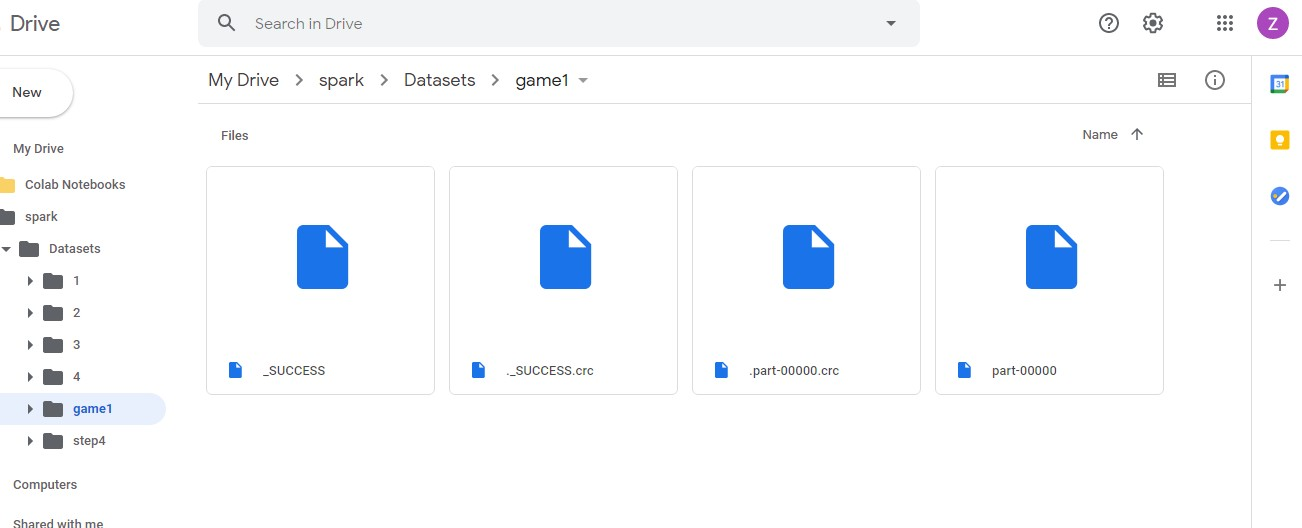

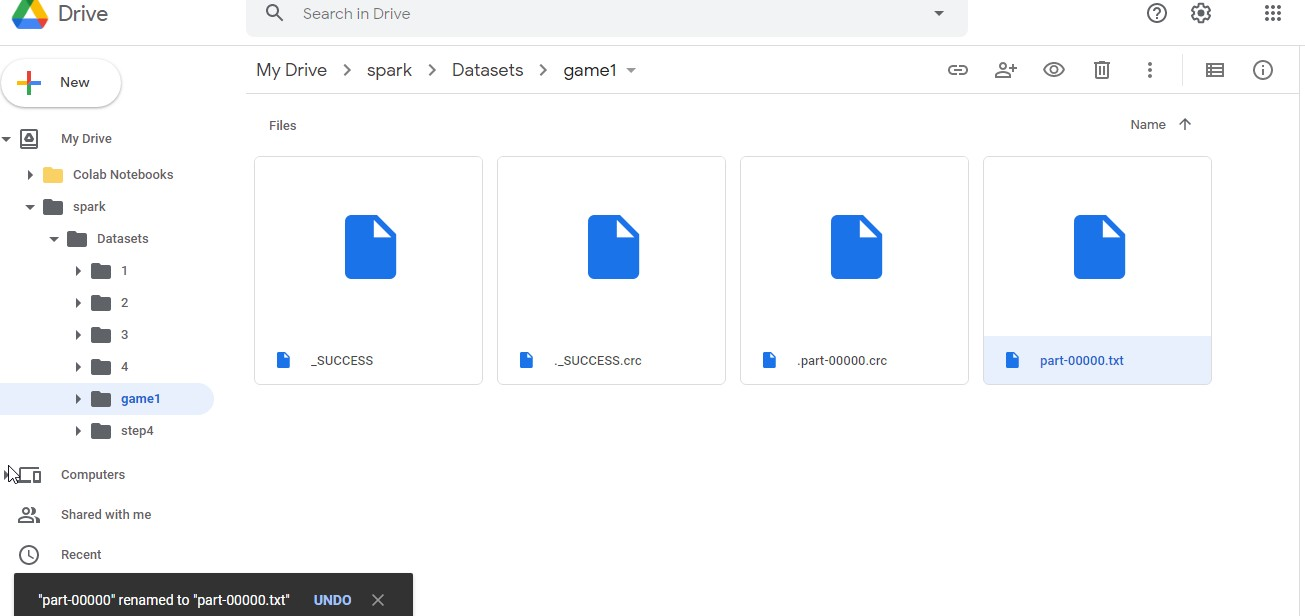

#step2

<div id="section1"   dir='rtl'>
    <h2>
در بخش دوم از ما خواسته شده است که تعداد کلماتی که با حرف m یا M شروع می شوند را پیدا کنیم .برای اینکار ابتدا countword که دقیقا تکست فایلی است که در مرحله ی قبل عملیات پیش پردازش بر روی انجام شده است را  با استفاده از تابع map به یک ارایه ی دوتایی از کلمات در میاوریم و 10 تا را نمایش می دهیم.در ادامه توضیح خواهم داد چرا اینکار را انجام می دهیم  </div>
</h2>
        <hr>

In [17]:
letter1=countword.map(lambda  word:(word,1))
letter1.take(10)


[('Games', 1),
 ('are', 1),
 ('a', 1),
 ('fun', 1),
 ('way', 1),
 ('to', 1),
 ('get', 1),
 ('people', 1),
 ('involved', 1),
 ('and', 1)]

<div id="section1"   dir='rtl'>
    <h2>
در ادامه کلمات مشابه را باهم  با استفاده از تابع reducedByKey  می شماریم و 10 تا را نمایش می دهیم  </div>
</h2>
        <hr>

In [18]:
letter=letter1.reduceByKey(lambda a,b:(a+b))
letter.take(10)

[('Games', 1),
 ('are', 32),
 ('way', 17),
 ('learning', 3),
 ('in', 116),
 ('them', 33),
 ('work', 3),
 ('concepts', 4),
 ('of', 162),
 ('Because', 2)]

<div id="section1"   dir='rtl'>
    <h2>
این سوال را هم با تعریف تابع و هم با استفاده از لامبدا حل کردم . ابتدا  دو حرف m,M را دریک لیست قرار دهیم     </div>
</h2>
        <hr>

first way

In [19]:
startwith=['m','M']

<div id="section1"   dir='rtl'>
    <h2>
و در نهایت با استفاده از تابع filter  کلماتی که در این ارایه دوتایی خانه اول یا صفر اندیس هستند و همینطور کلمه اول یا صفر اندیس انها m,M است،  دریافت می کنیم    </div>
</h2>
        <hr>

In [20]:
with_start= letter.filter(lambda i: i[0][0] in startwith )


<div id="section1"   dir='rtl'>
    <h2>
در نهایت با استفاده از تابع collect کل کلماتی که با m,M شروع می شوند را به همراه تعداد تکرارشان که صرفا به صورت منحصر به فرد نمایش داده شوند، نشان می دهیم </div>
</h2>
        <hr>

In [21]:
for i in with_start.collect():
  print(i)

('make', 6)
('more', 18)
('moves', 1)
('members', 1)
('mastering', 1)
('money', 2)
('magical', 1)
('may', 3)
('material', 1)
('meaning', 1)
('monochromatic', 1)
('making', 2)
('major', 1)
('means', 1)
('modern', 4)
('move', 1)
('massive', 2)
('matter', 3)
('meet', 2)
('Macbeth', 1)
('masterpieces', 1)
('months', 1)
('museum', 1)
('middle', 1)
('mastery', 1)
('many', 14)
('me', 14)
('my', 9)
('minute', 1)
('might', 2)
('made', 4)
('much', 6)
('merely', 1)
('method', 1)
('Marjane', 5)
('majority', 3)
('meant', 1)
('martyred', 1)
('most', 9)
('Many', 3)
('Magog', 1)
('myths', 1)
('moving', 1)
('moved', 2)
('mostly', 1)
('mines', 1)
('market', 1)
('musing', 1)
('miming', 1)
('Masque', 1)
('monarchies', 1)
('Modern', 1)
('Monet', 1)
('men', 2)
('makes', 1)
('minded', 1)


second way

<div id="section1"   dir='rtl'>
    <h2>
راه دوم این است که همان روش بالا را بدون استفاده از لامبدا حل کنیم و تابع تعریف کنیم و انرا به تابع filter پاس دهیم</div>
</h2>
        <hr>

In [22]:
def filterword(i):
    with_start=['m','M']
    return (i[0][0] in with_start)



In [23]:
with_start2= letter.filter(filterword)


<div id="section1"   dir='rtl'>
    <h2>
در نهایت با استفاده از تابع collect کل کلماتی که با m,M شروع می شوند را به همراه تعداد تکرارشان که صرفا به صورت منحصر به فرد نمایش داده شوند، نشان می دهیم </div>
</h2>
        <hr>

In [24]:
for i in with_start2.collect():
  print(i)

('make', 6)
('more', 18)
('moves', 1)
('members', 1)
('mastering', 1)
('money', 2)
('magical', 1)
('may', 3)
('material', 1)
('meaning', 1)
('monochromatic', 1)
('making', 2)
('major', 1)
('means', 1)
('modern', 4)
('move', 1)
('massive', 2)
('matter', 3)
('meet', 2)
('Macbeth', 1)
('masterpieces', 1)
('months', 1)
('museum', 1)
('middle', 1)
('mastery', 1)
('many', 14)
('me', 14)
('my', 9)
('minute', 1)
('might', 2)
('made', 4)
('much', 6)
('merely', 1)
('method', 1)
('Marjane', 5)
('majority', 3)
('meant', 1)
('martyred', 1)
('most', 9)
('Many', 3)
('Magog', 1)
('myths', 1)
('moving', 1)
('moved', 2)
('mostly', 1)
('mines', 1)
('market', 1)
('musing', 1)
('miming', 1)
('Masque', 1)
('monarchies', 1)
('Modern', 1)
('Monet', 1)
('men', 2)
('makes', 1)
('minded', 1)


#step3

<div id="section1"   dir='rtl'>
    <h2>
در این بخش از ما خواسته شده است که تعداد کلمات 5 حرفی را پیدا کنیم و ضمنا کلماتی که با حروف صدادارو حذف کنیم برای اینکار ابتدا کل حرف صدادار که 5 حرف هستند را در یک لیست Vowels قرار می دهیم   </div>
</h2>
        <hr>

In [25]:
Vowels =['a','e','i','u','o']

<div id="section1"   dir='rtl'>
    <h2>
سپس همان فایلی که به صورت ارایه بود را با استفاده از تابع فیلتر اینطور اعمال می کنیم که کلماتی که در خانه ی اول ارایه (اندیس صفر) هستند، 5 حرفی باشند و ضمنا در خانه ی اول ارایه هستند و کلمه ی اول انها (اندیس صفر کلمه) در این لیست کلمات صدادار نباشد   </div>
</h2>
        <hr>

In [26]:
letter_3= letter.filter(lambda i: len(i[0])==5 and i[0][0] not in Vowels)

<div id="section1"   dir='rtl'>
    <h2>
سپس با استفاده از تابع collect نمایش می دهیم  </div>
</h2>
        <hr>

In [27]:
for i in letter_3.collect():
  print(i)

('Games', 1)
('these', 14)
('games', 15)
('class', 7)
('where', 12)
('peers', 1)
('think', 12)
('names', 1)
('“Fuck', 1)
('count', 1)
('These', 6)
('three', 5)
('grasp', 3)
('there', 11)
('would', 10)
('start', 2)
('story', 4)
('point', 4)
('right', 2)
('Buddy', 5)
('group', 1)
('moves', 1)
('cards', 1)
('round', 1)
('quiet', 1)
('quite', 4)
('power', 3)
('rules', 2)
('bonus', 1)
('can’t', 1)
('calss', 1)
('world', 5)
('money', 2)
('based', 4)
('novel', 1)
('tells', 3)
('young', 4)
('comic', 1)
('style', 13)
('realm', 2)
('wants', 1)
('grows', 1)
('basis', 1)
('grace', 1)
('state', 1)
('Final', 1)
('treat', 1)
('space', 1)
('weeks', 2)
('WebGL', 1)
('tools', 1)
('wasnt', 1)
('worth', 1)
('roads', 1)
('walls', 4)
('major', 1)
('means', 1)
('ships', 2)
('trade', 3)
('goods', 1)
('water', 1)
('roman', 1)
('never', 1)
('siege', 1)
('haven', 1)
('lived', 1)
('tests', 1)
('roofs', 1)
('house', 2)
('faith', 1)
('Since', 1)
('plays', 1)
('scene', 2)
('likes', 2)
('Pablo', 1)
('Named', 1)
('gra

<div id="section1"   dir='rtl'>
    <h2>
در نهایت از ما خواسته شده که کلمات را به صورت مرتب شده نمایش دهیم می دانیم چون اریه دو قسمتی است ابتدا باید مقدار را با کلمه در این ارایه جابه جا کنیم(.سپس با استفاده از تابع sortByKey مقادیر تکرار کلمات را سورت کنیم   </div>
</h2>
        <hr>

In [28]:
sortletter_3=letter_3.map(lambda i:(i[1],i[0])).sortByKey(False)

<div id="section1"   dir='rtl'>
    <h2>
در نهایت مرتب شده این کلمات را نمایش می دهیم  </div>
</h2>
        <hr>

In [29]:
for i in sortletter_3.collect():
  print(i)

(19, 'which')
(19, 'their')
(15, 'games')
(15, 'could')
(14, 'these')
(13, 'style')
(12, 'where')
(12, 'think')
(11, 'there')
(11, 'place')
(10, 'would')
(9, 'great')
(7, 'class')
(7, 'There')
(7, 'being')
(6, 'These')
(6, 'lying')
(6, 'times')
(5, 'three')
(5, 'Buddy')
(5, 'world')
(5, 'first')
(5, 'while')
(5, 'hence')
(5, 'spend')
(4, 'story')
(4, 'point')
(4, 'quite')
(4, 'based')
(4, 'young')
(4, 'walls')
(4, 'level')
(4, 'Lying')
(4, 'still')
(4, 'built')
(4, 'cafés')
(3, 'grasp')
(3, 'power')
(3, 'tells')
(3, 'trade')
(3, 'takes')
(3, 'trust')
(3, 'focus')
(3, 'terms')
(3, 'given')
(3, 'began')
(2, 'start')
(2, 'right')
(2, 'rules')
(2, 'money')
(2, 'realm')
(2, 'weeks')
(2, 'ships')
(2, 'house')
(2, 'scene')
(2, 'likes')
(2, 'parks')
(2, 'drive')
(2, 'paper')
(2, 'final')
(2, 'since')
(2, 'going')
(2, 'found')
(2, 'don’t')
(2, 'might')
(2, 'gives')
(2, 'comes')
(2, 'After')
(2, 'teams')
(2, 'sense')
(2, 'build')
(2, 'river')
(2, 'hills')
(2, 'Roman')
(2, 'moved')
(2, 'shows')
(

#step 4

<div id="section1"   dir='rtl'>
    <h2>
در این گام چون مطرح شده همزنان هم استاپ ورد را حذف کنید و هم کل حروف غیر الفبایی. پس همان فایلی که کل علائم نقطه گذاری از ان حذف شد را دریافت می کنیم چون می خواهیم بیشترین کلماتی که تکرار شده اند را به ترتیب دریافت کنیم پس با استفاده از تابع map جای دو خانه را در ارایه عوض می کنیم یعنی مقادیر را اول می اوریم تا بتوان انرا سورت نزولی کرد   </div>
</h2>
        <hr>

In [30]:
sort_itre = letter.map(lambda i:(i[1],i[0])).sortByKey(False)
sort_itre.take(10)

[(312, 'the'),
 (237, 'and'),
 (162, 'of'),
 (152, 'to'),
 (116, 'in'),
 (106, 'a'),
 (76, 'is'),
 (60, 'that'),
 (57, 'people'),
 (52, 'it')]

<div id="section1"   dir='rtl'>
    <h2>
در نهایت کل کلمات سورت شده را نمایش می دهیم  </div>
</h2>
        <hr>

In [31]:
for i in sort_itre.collect():
  print(i)

(312, 'the')
(237, 'and')
(162, 'of')
(152, 'to')
(116, 'in')
(106, 'a')
(76, 'is')
(60, 'that')
(57, 'people')
(52, 'it')
(52, 'they')
(44, 'this')
(41, 'was')
(41, 'I')
(40, 'on')
(39, 'have')
(38, 'with')
(33, 'them')
(33, 'you')
(32, 'are')
(30, 'This')
(29, 'were')
(28, 'all')
(27, 'for')
(25, 'be')
(24, 'as')
(24, 'can')
(23, 'The')
(23, 'time')
(23, 'up')
(21, 'when')
(21, 'what')
(20, 'about')
(19, 'but')
(19, 'like')
(19, 'which')
(19, 'game')
(19, 'their')
(19, 'from')
(18, 'more')
(18, 'get')
(18, 'because')
(18, 'will')
(18, 'who')
(17, 'way')
(17, 'has')
(17, 'one')
(17, 'London')
(16, 'so')
(16, 'not')
(16, 'or')
(15, 'games')
(15, 'very')
(15, 'could')
(15, 'film')
(14, 'these')
(14, 'square')
(14, 'many')
(14, 'me')
(13, 'style')
(13, 'had')
(13, 'Square')
(12, 'where')
(12, 'think')
(12, 'at')
(12, 'other')
(12, 'In')
(12, 'also')
(11, 'use')
(11, 'there')
(11, 'Soho')
(11, 'place')
(11, 'your')
(11, 'important')
(11, 'everyone')
(11, 'been')
(11, 'city')
(10, 'would')

we calcute it in stpe 1
countword=textfile.flatMap(lambda word: word.split(" ")).filter(lambda x:x!='')
the count of words with out punctuation_mark are 5004,we calcute 10 percent of top words

<div id="section1"   dir='rtl'>
    <h2>
سپس با استفاده از تابع flatMap از کل کلمات سورت شده بیشترین مقدار تا کمترین(sort_itre) ، 10 درصد ،،5004 کلمه ی موجود در این فایل تکست که عاری از کلمات نقطه گذاری هستند را حساب کرده که حدود 500 کلمه می شود، سپس این 500 کلمه ی sort_itre را در استاپ ورد می ریزیم  </div>
</h2>
        <hr>

In [32]:
stop_word = sort_itre.flatMap(lambda i:(i[1] for j in range(0,len(i)-1))).take(round(countword.count()*10/100))
stop_word

['the',
 'and',
 'of',
 'to',
 'in',
 'a',
 'is',
 'that',
 'people',
 'it',
 'they',
 'this',
 'was',
 'I',
 'on',
 'have',
 'with',
 'them',
 'you',
 'are',
 'This',
 'were',
 'all',
 'for',
 'be',
 'as',
 'can',
 'The',
 'time',
 'up',
 'when',
 'what',
 'about',
 'but',
 'like',
 'which',
 'game',
 'their',
 'from',
 'more',
 'get',
 'because',
 'will',
 'who',
 'way',
 'has',
 'one',
 'London',
 'so',
 'not',
 'or',
 'games',
 'very',
 'could',
 'film',
 'these',
 'square',
 'many',
 'me',
 'style',
 'had',
 'Square',
 'where',
 'think',
 'at',
 'other',
 'In',
 'also',
 'use',
 'there',
 'Soho',
 'place',
 'your',
 'important',
 'everyone',
 'been',
 'city',
 'would',
 'an',
 'buildings',
 'then',
 'know',
 'however',
 'came',
 'different',
 'area',
 'want',
 'great',
 'by',
 'my',
 'its',
 'most',
 'only',
 'after',
 'into',
 'how',
 'some',
 'through',
 'wall',
 'class',
 'really',
 'tell',
 'something',
 'do',
 'It',
 'during',
 'squares',
 'such',
 'There',
 'being',
 'little

<div id="section1"   dir='rtl'>
    <h2>
در نهایت تابع زیر را می نویسیم که کل حروف غیر الفبایی و استاپ ورد ها را حذف می کند و اگر کلمه ای مثلا وسط ان the بود از وسط کلمه حذف نمی کند ، فقط the را حذف می کند دو طرفش کلمه ای نباشد والا اگر بخواهد این استاپ ورد را از وسط کلمه حذف کند معنای کلمه بهم می ریزد و صرفا یک سری کلمات شکسته داریم </div>
</h2>
        <hr>

In [33]:
def stop_word_clean(i):
  punc='%^&*-+\f\v\t\n\r.\'\\/"[](){}~!?@#$_-|”“’:;,<>«»'
  for chr in punc:
    i = i.replace(chr,'')
  for stop_wrd in stop_word:
     i = i.replace(' '+stop_wrd+' ',' ')
  return i

<div id="section1"   dir='rtl'>
    <h2>
سپس با استفاده از تابع map در اسپارک این تابع تعریف شده در بالا که عملیات حئف علائم غیرالفبایی و استاپ ورد ها را برای ما انجام می دهد،بر روی فایل تکست اثر و نمایش می دهیم</div>
</h2>
        <hr>

In [34]:
textfile2 = textfile.map(stop_word_clean)
textfile2.take(2)

['Games involved happy loosened learn reinforcing talked familiar lectures spin test our peers With able connection framing extent want subject practice mastery Rufo shown us anything total Car salesman goes names purposes referred Win You Lose precursor the debate off didnt count several overlapped Im discuss strongest admitting straight teaming Im stronger persuading easier competition excel played strong focused ',
 'Lying instantly facet Im outright exceed dont exactly truth dont question saying ways conversation passionate nod affirm slip table winning card everybody wins gonna X minute write Y reap rewards Five seem exaggeration Secondly lied expect Im sort expectation later i outlandish believing ']

<div id="section1"   dir='rtl'>
    <h2>
حال می خواهیم ببینیم تعداد کلمات این متن بااعمال عملیات بالا از 5004 به چه تعداد رسیده است</div>
</h2>
        <hr>

In [35]:
x1=textfile2.flatMap(lambda word: word.split(" ")).filter(lambda x:x!='')


In [36]:
x1.count()

883

#SAVE FILE

<div id="section1"   dir='rtl'>
    <h2>
 در نهایت با استفاده از تابع saveAsTextFile می کنیم از تابع coalesce(1) استفاده می کنیم تا ریزالت در یک فایل قرار گیرد والا ریزالت در دو فایل قرار می 
 گیرد ضمنا پسوند txt باید به اخر فایل اضافه کنیم چون ابتدا همانطوری که در تصویر زیر می بینیم به صورت خام فایل را سیو می کند. در نهایت فایل txt که ریزالت ما می باشد را دانلود می کنیم و این فایل به گزارش کار در پوشه گام 1 و step4 پیوست داده شده است  </div>
</h2>
        <hr>

In [ ]:
textfile2.coalesce(1).saveAsTextFile("/content/drive/MyDrive/spark/Datasets/step4")

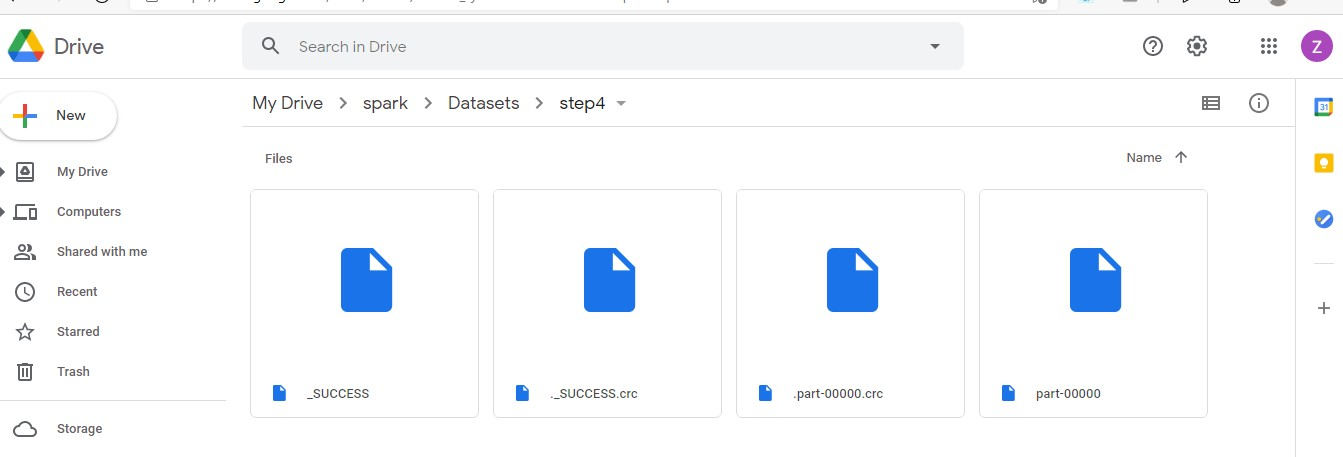

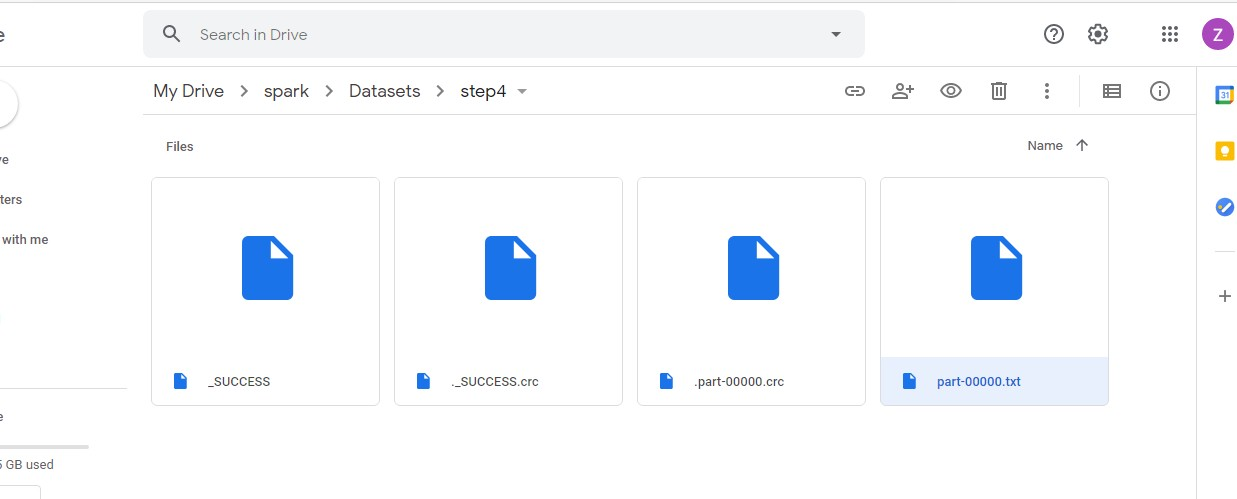

#step5

<div id="section1"   dir='rtl'>
    <h2>
در این گام از ما خواسته شده است که تعداد کلمه ای که بیش از یکبار کنار هم قرار دارند را به ترتیب پیدا کنیم. فرض را بر این می گیریم که این گام 5 به 4 گام قبلی پیوسته نیست و این بخش را بر روی فایل خام تکست انجام می دهم  </div>
</h2>
        <hr>

In [37]:
sc = spark.sparkContext
datafile=sc.textFile("/content/drive/MyDrive/spark/Datasets/1/input.txt")

<div id="section1"   dir='rtl'>
    <h2>
در بخش اول ابتدا با استفاده از تابع flatmap در یک لیست کل فایل را قرار می دهیم سپس تا نقطه با استفاده از split خطوط را جدا می کنیم و در ادامه با استفاده از map به صورت کلمه تکست را جدا می کنیم و سپس با استفاده از flatmap کلمات دوتایی کنار هم قرار می دهیم  </div>
</h2>
        <hr>

In [38]:
bigrams = datafile.flatMap(lambda line: line.split(".")) \
                   .map(lambda word: word.strip().split(" ")) \
                   .flatMap(lambda z: (tuple(x) for x in zip(z, z[1:])))
bigrams.take(10)

[('Games', 'are'),
 ('are', 'a'),
 ('a', 'fun'),
 ('fun', 'way'),
 ('way', 'to'),
 ('to', 'get'),
 ('get', 'people'),
 ('people', 'involved'),
 ('involved', 'and'),
 ('and', 'learning')]

<div id="section1"   dir='rtl'>
    <h2>
در نهایتت مانند مراحل قبل برای اینکه تعداد تکرار این کلمات دو تایی را پیدا کنیم از تابع map و reducedByKey استفاده می کنیم  </div>
</h2>
        <hr>

In [39]:
bigrams=bigrams.map(lambda word: (word, 1)).reduceByKey(lambda word, otherword: word + otherword)
bigrams.take(10)

[(('Games', 'are'), 1),
 (('a', 'fun'), 2),
 (('to', 'get'), 9),
 (('get', 'people'), 4),
 (('people', 'involved'), 1),
 (('involved', 'and'), 1),
 (('learning', 'in'), 1),
 (('a', 'happy'), 1),
 (('happy', 'environment'), 1),
 (('environment', 'and'), 1)]

<div id="section1"   dir='rtl'>
    <h2>
در ادامه می خواهیم این کلمات دوتایی را بر اساس مقادیرشان مرتب کنیم که با استفاده از map مه به صورت ارایه دوتایی هستند جای مقادیر و کلمات را جابه جا می کنیم و بعد با تابع sortByKey مقادیر کلمات دوتایی را سورت می کنیم  </div>
</h2>
        <hr>

In [40]:
bigrams=bigrams.map(lambda i:(i[1],i[0])).sortByKey(False)


<div id="section1"   dir='rtl'>
    <h2>
در ادامه چون کلمات دوتایی که بیشتر از 1 بار تکرا شده اند را می خواهیم با استفاده از تابع filter ، از مقادیری که مقدارشان برابر با 1 است صرف نظر می کنیم یعنی مقادیر غیر از 1 را می گیریم </div>
</h2>
        <hr>

In [41]:
bigrams= bigrams.filter(lambda i: i[0]!=1)

<div id="section1"   dir='rtl'>
    <h2>
در نهایت با استفاده از تابع collect همه ی این دوتایی های کنار هم که مقادیر تکراشان بیشتر از 1 است و به صورت نزولی مرتب شدنده اند را نمایش می دهیم </div>
</h2>
        <hr>

In [42]:
for i in bigrams.collect():
  print(i)

(56, ('of', 'the'))
(48, ('in', 'the'))
(15, ('and', 'the'))
(12, ('on', 'the'))
(12, ('all', 'of'))
(11, ('to', 'the'))
(10, ('people', 'to'))
(10, ('of', 'a'))
(9, ('to', 'get'))
(9, ('of', 'this'))
(9, ('with', 'the'))
(9, ('in', 'a'))
(9, ('it', 'is'))
(9, ('Soho', 'Square'))
(8, ('This', 'is'))
(8, ('the', 'square'))
(7, ('this', 'is'))
(7, ('for', 'the'))
(7, ('them', 'to'))
(7, ('is', 'the'))
(7, ('one', 'of'))
(7, ('the', 'way'))
(7, ('have', 'been'))
(6, ('in', 'this'))
(6, ('will', 'be'))
(6, ('that', 'they'))
(6, ('the', 'game'))
(6, ('and', 'then'))
(6, ('have', 'a'))
(6, ('is', 'a'))
(6, ('it', 'was'))
(6, ('as', 'a'))
(6, ('gender', 'and'))
(6, ('in', 'London'))
(5, ('of', 'them'))
(5, ('want', 'to'))
(5, ('me', 'to'))
(5, ('that', 'the'))
(5, ('In', 'the'))
(5, ('they', 'were'))
(5, ('can', 'be'))
(5, ('to', 'be'))
(5, ('the', 'film'))
(5, ('on', 'a'))
(5, ('the', 'people'))
(5, ('and', 'hence'))
(5, ('and', 'not'))
(5, ('the', 'games'))
(5, ('some', 'of'))
(5, ('at', 't